## Simulate Random conversation , Perform Analysis and then Improve prompt and Documents with feedback

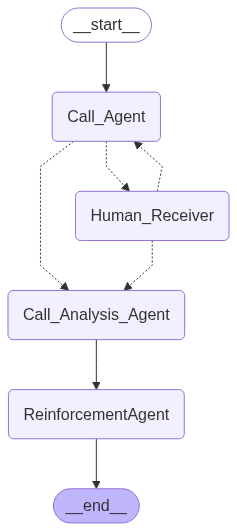

In [2]:
from IPython.display import Image, display, Markdown
from langgraph.graph import START, END, StateGraph
from agents import CallSchema , CallAgentNode , humanAgentNode , isEndCall , isEndCall2, callAnalysisAgent, ReinforcementAgent
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

workflow = StateGraph(CallSchema)

workflow.add_node("Call_Agent", CallAgentNode)
workflow.add_node("Human_Receiver", humanAgentNode)
workflow.add_node("Call_Analysis_Agent" , callAnalysisAgent)
workflow.add_node("ReinforcementAgent", ReinforcementAgent)

workflow.add_edge(START , "Call_Agent" )
workflow.add_conditional_edges("Call_Agent" , isEndCall, ["Human_Receiver" , "Call_Analysis_Agent"])
workflow.add_conditional_edges("Human_Receiver", isEndCall2 , ["Call_Agent", "Call_Analysis_Agent"])
workflow.add_edge("Call_Analysis_Agent" , "ReinforcementAgent")
workflow.add_edge("ReinforcementAgent", END)

graph = workflow.compile()
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [2]:
from langchain_core.messages import HumanMessage
general_base_prompt = open("base_prompt.txt", "r").read()
scheme_name = "PM-KUSUM"
scheme_path = "aboutScheme.md"
scheme_content = open(scheme_path, "r").read()

initialState = CallSchema(
    general_prompt_for_agent=general_base_prompt,
    scheme_name=scheme_name,
    schema_content=scheme_content,
    ai_conversation=[HumanMessage(content="Hello")],
    reply_style="Not interested"
)

result1 = graph.invoke(initialState)

AI :  नमस्ते! क्या मैं अमित जी से बात कर रहा हूँ?
Human :  हाँ, मैं अमित हूँ।
AI :  मैं आपको प्रधानमंत्री किसान ऊर्जा सुरक्षा एवं उत्थान महाभियान (PM-KUSUM) योजना के बारे में बताना चाहता हूँ।
Human :  मुझे इसमें कोई दिलचस्पी नहीं है।
AI :  क्या आप कृपया बता सकते हैं कि आपको किस चीज़ में दिलचस्पी है?
Human :  मुझे किसी भी चीज़ में दिलचस्पी नहीं है।
AI :  ठीक है, कोई बात नहीं।
Human :  रहने दो।


 ------------------- Analysis Result ----------------- 
sentiment='Negative' interest_level='Disinterested' intro_clarity='Clear' objection_type=['None'] objection='None' call_outcome='Failure' ignore_any_agent_question=False
Modified Instruction : 
 1.  **Introduce the scheme :** After the initial greeting, you should introduce the scheme in Hindi. Use a polite and soft tone. 

2.  **Maintain engagement:** Keep the conversation flowing naturally. Use a soft and understanding tone.

3.  **Fulfill user's intent:** Help the user achieve their goal or answer their questions effectively. Be patient 

In [3]:
from langchain_core.messages import HumanMessage
general_base_prompt = open("base_prompt.txt", "r").read()
scheme_name = "PM-KUSUM"
scheme_path = "aboutScheme.md"
scheme_content = open(scheme_path, "r").read()

initialState = CallSchema(
    general_prompt_for_agent=general_base_prompt,
    scheme_name=scheme_name,
    schema_content=scheme_content,
    ai_conversation=[HumanMessage(content="Hello")],
    reply_style="interested"
)

result2 = graph.invoke(initialState)

AI :  नमस्ते! क्या मैं अमित जी से बात कर रहा हूँ?
Human :  हाँ, मैं अमित हूँ। आप कौन हैं?
AI :  मैं आपको प्रधानमंत्री किसान ऊर्जा सुरक्षा एवं उत्थान महाभियान (PM-KUSUM) योजना के बारे में जानकारी देना चाहता हूँ।
Human :  हाँ, बताइए।
AI :  यह योजना किसानों के लिए है और इसका उद्देश्य डीजल पर निर्भरता कम करना और किसानों की आय बढ़ाना है। क्या आप इस योजना के बारे में और जानना चाहेंगे?
Human :  हाँ, मुझे इस योजना के बारे में और जानने में दिलचस्पी है।
AI :  इस योजना के तीन मुख्य घटक हैं: 

पहला घटक, किसानों की भूमि पर विकेन्द्रीकृत ग्राउंड/स्टिल्ट माउंटेड ग्रिड कनेक्टेड सौर या अन्य नवीकरणीय ऊर्जा आधारित बिजली संयंत्रों की स्थापना करना है।

दूसरा घटक, स्टैंड-अलोन सौर कृषि पंपों की स्थापना करना है।

तीसरा घटक, ग्रिड कनेक्टेड कृषि पंपों का सोलराइजेशन करना है।

क्या आप इनमें से किसी भी घटक के बारे में अधिक जानकारी चाहते हैं?
Human :  हाँ, मुझे पहले घटक के बारे में और जानकारी चाहिए।
AI :  पहले घटक के तहत, किसान अपनी भूमि पर पांच सौ किलोवाट से दो मेगावाट क्षमता तक के नवीकरणीय ऊर्जा बिजली संयंत्र स्थ

## Other Demos

### convert Text to Speech call

In [ ]:
!pip install elevenlabs

## V3 API is not available yet . Let's skip this 

In [3]:
from elevenlabs import DialogueInput, ElevenLabs

full_conversation = []
for msg in result1['ai_conversation'][1:]:
    if(type(msg) == AIMessage):
        inp = DialogueInput(
            text=msg.content,
            voice_id="qSV5UqvHBC0Widy71Esh",
        )
    else:
        inp = DialogueInput(
            text=msg.content,
            voice_id="Uyx98Ek4uMNmWN7E28CD",
        )
    full_conversation.append(inp)

In [ ]:
client = ElevenLabs(
    api_key="API_KEY",
)

with open("audio.mp3", "wb") as f:
    for chunk in client.text_to_dialogue.convert(
        inputs=full_conversation):
        f.write(chunk)

### Try multiple call to the eleven Lab not an efficient solution

In [5]:
import shutil
import os
shutil.rmtree("audio_AI_HUMAN/" , ignore_errors=True)
os.makedirs("audio_AI_HUMAN/")

audio_file_paths = []
for idx,msg in enumerate(result1['ai_conversation'][1:]):
    if(type(msg) == AIMessage):
        voice_id = "qSV5UqvHBC0Widy71Esh"
        audio_speed = 0.9
    else:
         voice_id = "6MoEUz34rbRrmmyxgRm4"
         audio_speed = 1
    with open(f"audio_AI_HUMAN/{idx}.mp3", "wb") as f:
        for chunk in client.text_to_speech.convert(
                voice_id="qSV5UqvHBC0Widy71Esh",
                output_format="mp3_44100_128",
                text=msg.content,
                model_id="eleven_multilingual_v2",
                voice_settings={
                    "speed": audio_speed
                }
            ):
            f.write(chunk)
    audio_file_paths.append(f"audio_AI_HUMAN/{idx}.mp3")

In [6]:
# stitch them together 
from pydub import AudioSegment

combined_audio = AudioSegment.empty()
for audio_path in audio_file_paths:
    audio_segment = AudioSegment.from_mp3(audio_path)
    combined_audio += audio_segment


final_output_path = f"audio_AI_HUMAN/complete_conv.mp3"
combined_audio.export(final_output_path, format="mp3")


<_io.BufferedRandom name='audio_AI_HUMAN/complete_conv.mp3'>

### Convert Speech back to text for multispeaker [Eleven Lab AI doesn't work]

In [7]:
final_output_path

'audio_AI_HUMAN/complete_conv.mp3'

In [8]:
# convert this audio to transcript 
result_speech = client.speech_to_text.convert(
    file=open(final_output_path, "rb"),
    model_id="scribe_v1",
    file_format="other",
    num_speakers = 2,
    language_code = "hi",
)

In [9]:
result_speech.text

'नमस्ते, क्या मैं अमित जी से बात कर रहा हूं? हां, मैं अमित हूं। मैं आपको प्रधानमंत्री किसान ऊर्जा सुरक्षा एवं उत्थान महाभियान पीएम कुसुम योजना के बारे में बताना चाहता हूं। मुझे इसमें कोई दिलचस्पी नहीं है। क्या आप कृपया बता सकते हैं कि आपको किस चीज में दिलचस्पी है? मुझे किसी भी चीज में दिलचस्पी नहीं है। ठीक है, कोई बात नहीं। रहने दो।'

In [11]:
for word in result_speech.words:
    print(word)

text='नमस्ते,' start=0.14 end=0.699 type='word' speaker_id=None logprob=0.0 characters=None
text=' ' start=0.699 end=0.74 type='spacing' speaker_id=None logprob=0.0 characters=None
text='क्या' start=0.74 end=0.839 type='word' speaker_id=None logprob=0.0 characters=None
text=' ' start=0.839 end=0.879 type='spacing' speaker_id=None logprob=0.0 characters=None
text='मैं' start=0.879 end=0.959 type='word' speaker_id=None logprob=0.0 characters=None
text=' ' start=0.959 end=0.979 type='spacing' speaker_id=None logprob=0.0 characters=None
text='अमित' start=0.979 end=1.179 type='word' speaker_id=None logprob=0.0 characters=None
text=' ' start=1.179 end=1.199 type='spacing' speaker_id=None logprob=0.0 characters=None
text='जी' start=1.199 end=1.3 type='word' speaker_id=None logprob=0.0 characters=None
text=' ' start=1.3 end=1.319 type='spacing' speaker_id=None logprob=0.0 characters=None
text='से' start=1.319 end=1.379 type='word' speaker_id=None logprob=0.0 characters=None
text=' ' start=1.37

### Using whisper hindi model

In [12]:
import torch
from transformers import pipeline

/home/divyanshu/Downloads/bhaktiKatha/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
audio = final_output_path
device = "cuda:0" if torch.cuda.is_available() else "cpu"
transcribe = pipeline(task="automatic-speech-recognition", model="vasista22/whisper-hindi-small", chunk_length_s=30, device=device)
transcribe.model.config.forced_decoder_ids = transcribe.tokenizer.get_decoder_prompt_ids(language="hi", task="transcribe")
print('Transcription: ', transcribe(audio)["text"])

Device set to use cuda:0
Using `chunk_length_s` is very experimental with seq2seq models. The results will not necessarily be entirely accurate and will have caveats. More information: https://github.com/huggingface/transformers/pull/20104. Ignore this warning with pipeline(..., ignore_warning=True). To use Whisper for long-form transcription, use rather the model's `generate` method directly as the model relies on it's own chunking mechanism (cf. Whisper original paper, section 3.8. Long-form Transcription).
/home/divyanshu/Downloads/bhaktiKatha/venv/lib/python3.12/site-packages/transformers/models/whisper/generation_whisper.py:604: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
The attention mask is not set and cannot be inferred from input because pad token is same as e

Transcription:  नमस्ते क्या मैं अमित जी से बात कर रहा हूँ हाँ मैं अमित हूँ मैं आपको प्रधानमंत्री किसान ऊर्जा सुरक्षा एवं उत्थान महाभियान पीएम कुसौम योजना के बारे में बताना चाहता हूँ मुझे इसमें कोई दिलचस्पी नहीं है क्या आप कृप्या बता सकते हैं कि आपको किस चीज में दिलचस्पी है मुझे किसी भी चीज में दिलचस्पी नहीं है ठीक है कोई बात नहीं रहने दो


In [16]:
del transcribe

In [15]:
!pip install assemblyai


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Not good for speaker segmentation 

In [ ]:
import assemblyai as aai
aai.settings.api_key = "API_KEY"
audio_file = final_output_path
config = aai.TranscriptionConfig(speech_model=aai.SpeechModel.best , language_code="hi", speakers_expected=2, speaker_labels=True)
transcript = aai.Transcriber(config=config).transcribe(audio_file)

In [22]:
transcript.get_sentences()

[Sentence(text='नमस्ते क्या मैं अमित जी ऐसी बात कर रहा हूँ, हाँ मैं अमित.', start=160, end=3180, confidence=0.98207194, speaker='A', channel=None, words=[Word(text='नमस्ते', start=160, end=500, confidence=0.98207194, speaker='A', channel=None), Word(text='क्या', start=720, end=820, confidence=0.9872366, speaker='A', channel=None), Word(text='मैं', start=860, end=940, confidence=0.71843374, speaker='A', channel=None), Word(text='अमित', start=1000, end=1160, confidence=0.9139121, speaker='A', channel=None), Word(text='जी', start=1200, end=1240, confidence=0.9754134, speaker='A', channel=None), Word(text='ऐसी', start=1300, end=1360, confidence=0.8509338, speaker='A', channel=None), Word(text='बात', start=1420, end=1520, confidence=0.9788655, speaker='A', channel=None), Word(text='कर', start=1600, end=1660, confidence=0.9941334, speaker='A', channel=None), Word(text='रहा', start=1720, end=1800, confidence=0.89872503, speaker='A', channel=None), Word(text='हूँ,', start=1840, end=1920, confi